### IMPORT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from pygam import LinearGAM, s, f
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 깨지지않게 해줌

# RF

### OLS 변수들

In [2]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [3]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','회사채3년(평균)','건물연식','LTV','물건금액(만원)']]

In [4]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', 'GDP대비가계부채비율', '환율종가','EPU', '장단기금리spread','물건금액(만원)']]

KeyError: "['부동산거래량', 'GDP대비가계부채비율', '환율종가', 'EPU', '장단기금리spread'] not in index"

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.03156268808213443
Test set RMSE: 0.17765890938012208
Test set r2_score : 0.7421103360670367


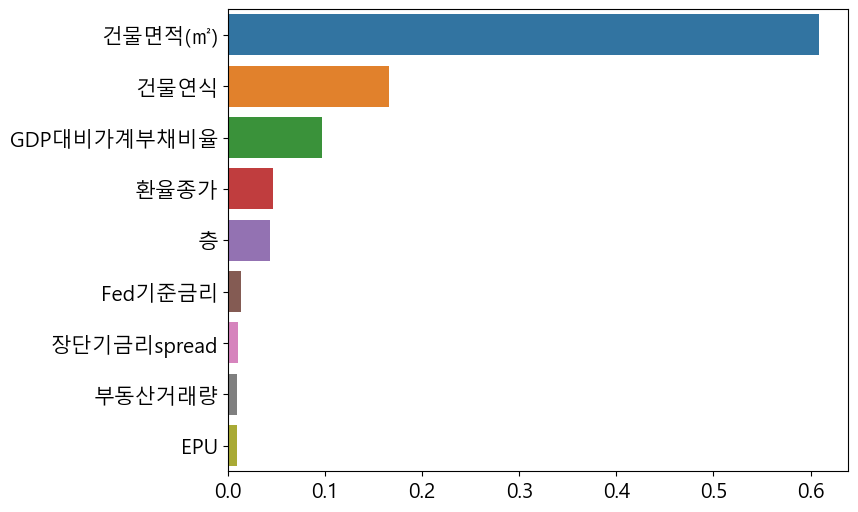

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','부동산거래량','회사채3년(평균)','건물연식','EPU','LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.03156268808213443
Test set RMSE: 0.17765890938012208
Test set r2_score : 0.7421103360670367


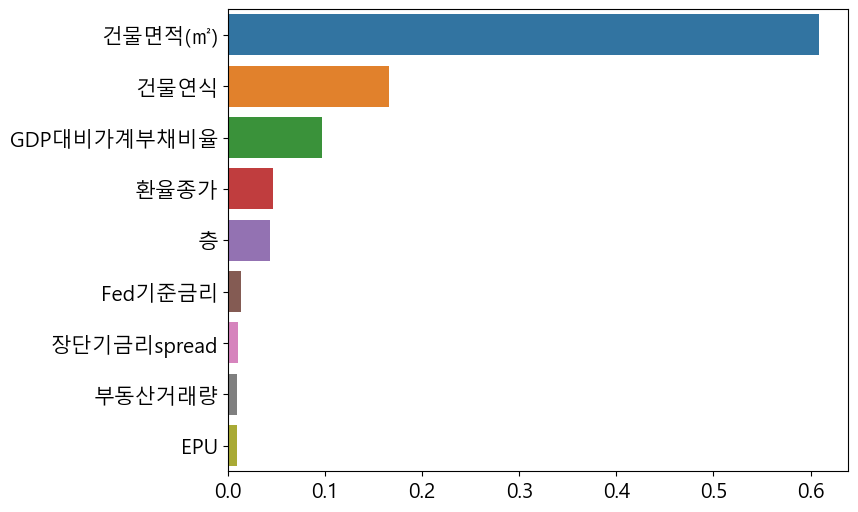

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# XGB

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', 'GDP대비가계부채비율', '환율종가','EPU', '장단기금리spread','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# xgb 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.026362900124284983
Test set RMSE: 0.16236656097942392
Test set r2_score : 0.7845963108193423


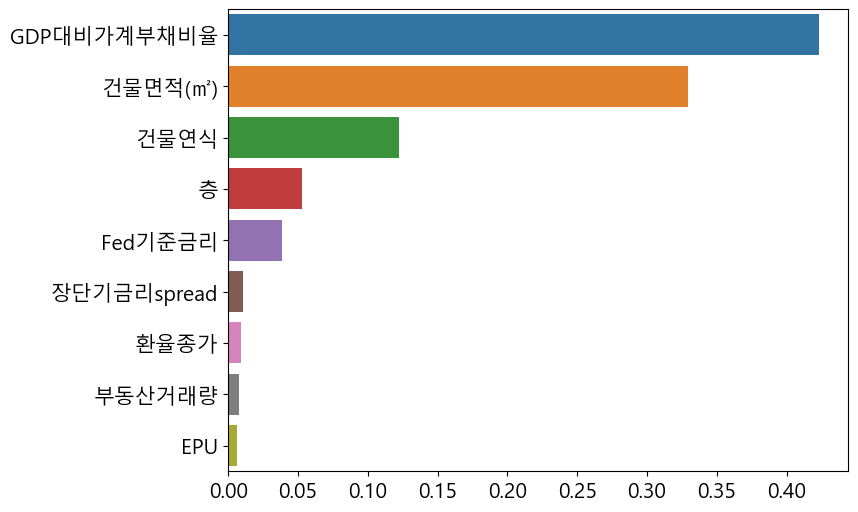

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','부동산거래량','회사채3년(평균)','건물연식','EPU','LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# xgb 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.026362900124284983
Test set RMSE: 0.16236656097942392
Test set r2_score : 0.7845963108193423


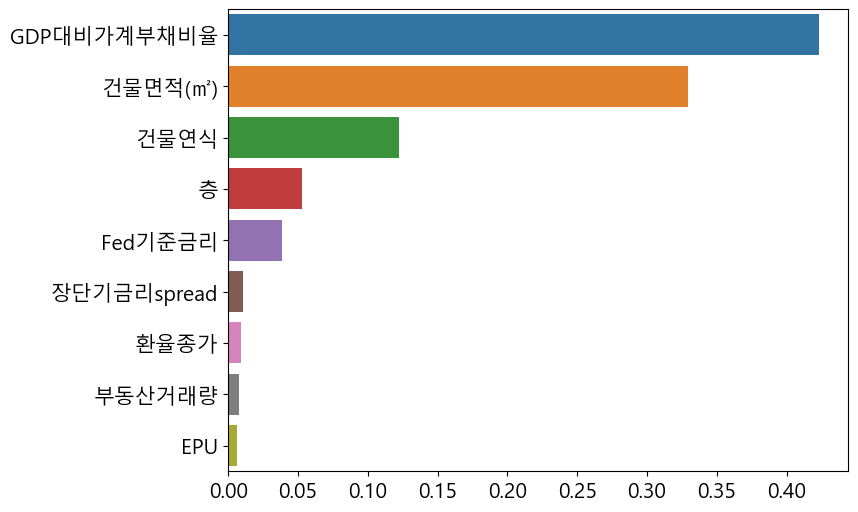

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# DT

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', 'GDP대비가계부채비율', '환율종가','EPU', '장단기금리spread','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 결정 나무 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.05575712395501809
Test set RMSE: 0.236129464394044
Test set r2_score : 0.5444245458051682


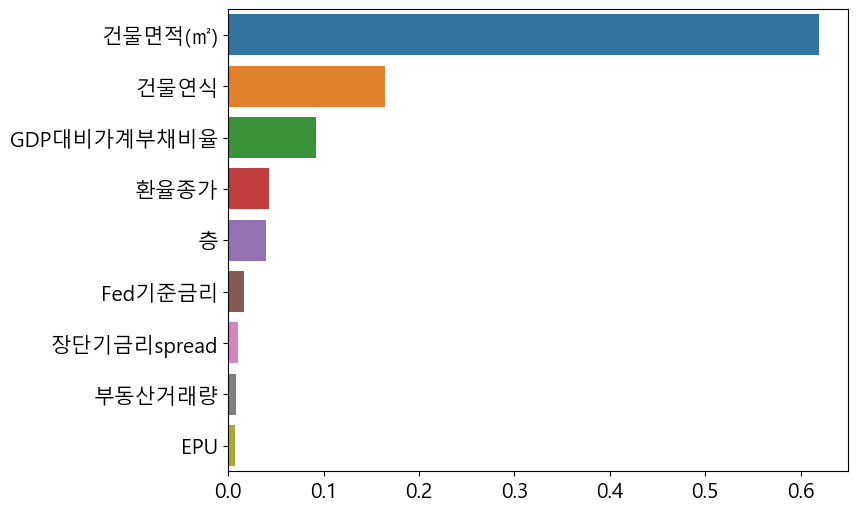

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','부동산거래량','회사채3년(평균)','건물연식','EPU','LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# 결정 나무 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.05575712395501809
Test set RMSE: 0.236129464394044
Test set r2_score : 0.5444245458051682


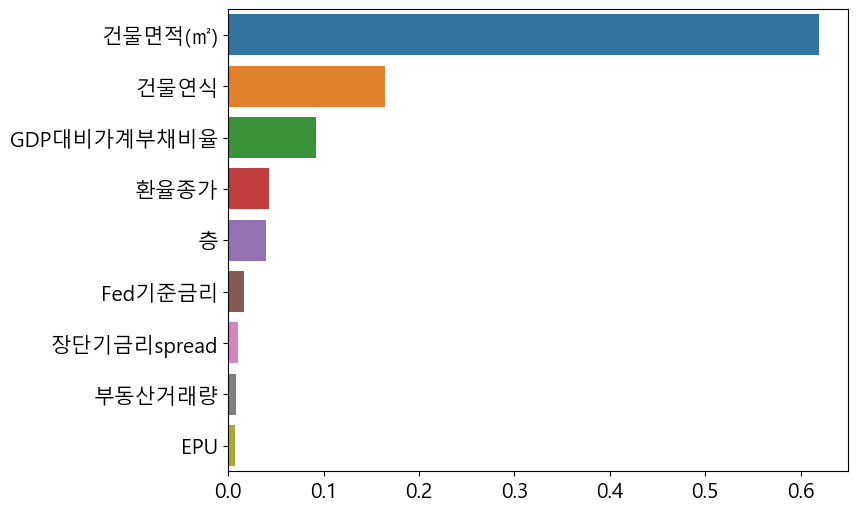

In [ ]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

# RB(HR)

https://runebook.dev/ko/docs/scikit_learn/modules/generated/sklearn.linear_model.huberregressor

로버스트 회귀모델 중 HuberRegressor사용


HuberRegressor는 로버스트 회귀를 위해 설계된 모델로, 이상치에 강건한 추정을 제공하는 것이 주요 목적입니다. 따라서, HuberRegressor를 사용할 때 주로 모델의 성능 평가나 변수의 중요도를 평가하기 위해 다른 지표나 방법을 활용해야 합니다.

예를 들어, HuberRegressor 모델의 변수 중요도를 평가하려면 다음과 같은 방법을 고려할 수 있습니다:

계수(Coefficients) 확인: HuberRegressor 모델의 coef_ 속성을 확인하여 각 독립 변수의 계수 값을 확인할 수 있습니다. 이는 변수가 종속 변수에 얼마나 큰 영향을 미치는지를 나타냅니다.

변수 제거 기법: HuberRegressor 모델에서 가장 중요한 변수를 확인하기 위해 변수를 하나씩 제거하고 모델의 성능 변화를 관찰할 수 있습니다. 성능 변화가 큰 변수는 중요한 변수로 간주할 수 있습니다.

Permutation Importance: permutation importance는 변수를 무작위로 섞어 모델의 성능 변화를 평가하는 방법입니다. 이를 통해 변수의 중요도를 추정할 수 있습니다. scikit-learn의 permutation_importance 함수를 사용하여 수행할 수 있습니다.

이러한 방법들을 활용하여 HuberRegressor 모델의 변수 중요도를 평가할 수 있습니다. 하지만 주의할 점은 HuberRegressor가 다른 회귀 모델보다 변수 중요도를 명시적으로 제공하지 않는다는 점입니다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', 'GDP대비가계부채비율', '환율종가','EPU', '장단기금리spread','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = HuberRegressor()

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.05734215544026916
Test set RMSE: 0.23946222132158793
Test set r2_score : 0.5314737085383658


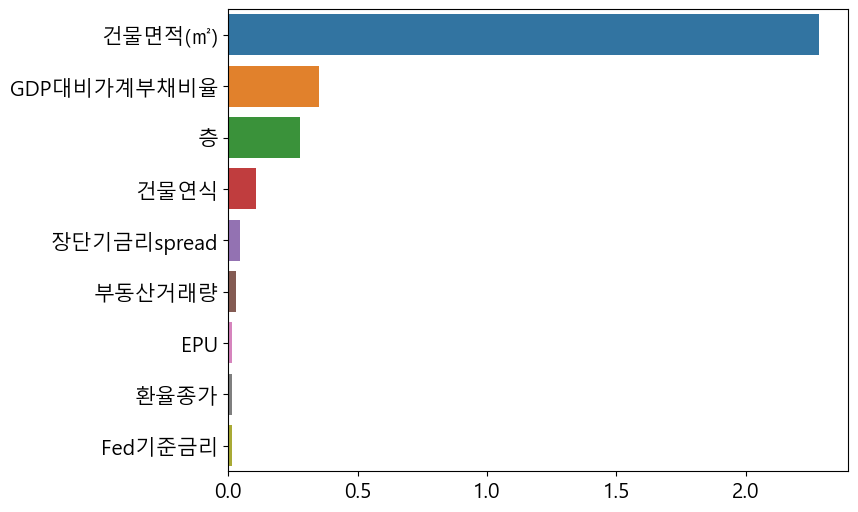

In [ ]:
# test_df
importances = np.abs(model.coef_)
# 상위 20개 변수 추출
top_features = pd.Series(importances, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## R_OLS 변수들

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','부동산거래량','회사채3년(평균)','건물연식','EPU','LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = HuberRegressor()

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.026362900124284983
Test set RMSE: 0.16236656097942392
Test set r2_score : 0.7845963108193423


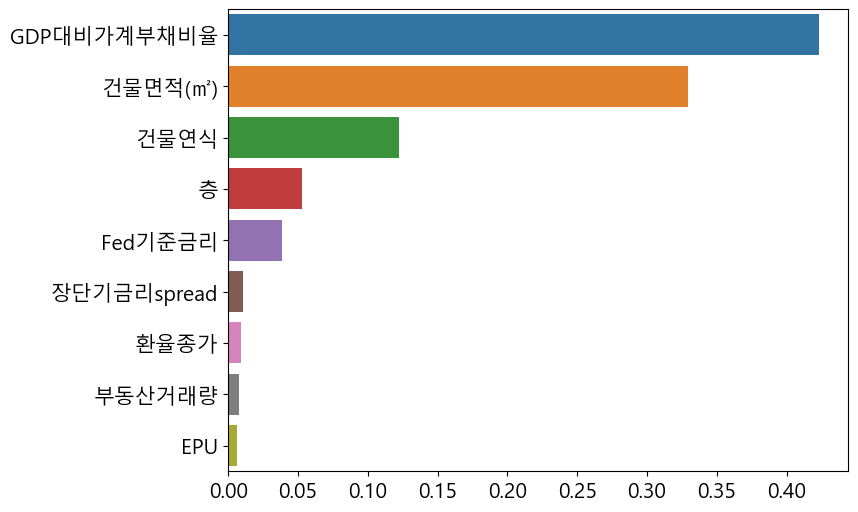

In [ ]:
# test_df
importances = np.abs(model.coef_)
# 상위 20개 변수 추출
top_features = pd.Series(importances, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show()

## GAM

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리', '부동산거래량', '건물연식', 'GDP대비가계부채비율', '환율종가','EPU', '장단기금리spread','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = LinearGAM(s(0))

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.07904168465064114
Test set RMSE: 0.2811435303375149
Test set r2_score : 0.35417308442790163


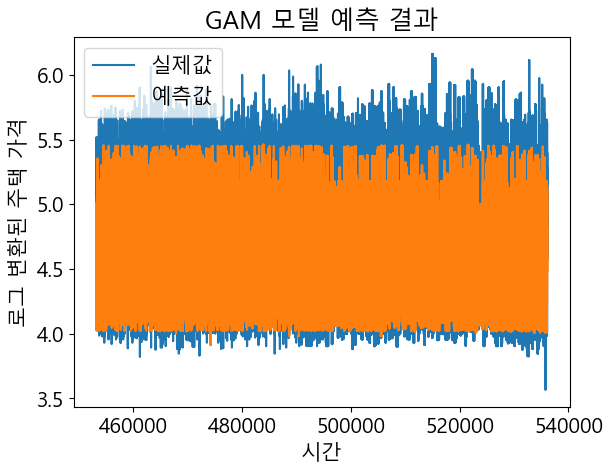

In [ ]:
# 예측 결과 시각화
plt.plot(y_test.index, y_test_scaled, label='실제값')
plt.plot(y_test.index, test_predictions, label='예측값')
plt.xlabel('시간')
plt.ylabel('로그 변환된 주택 가격')
plt.title('GAM 모델 예측 결과')
plt.legend()
plt.show()

### R_OLS 변수들

In [ ]:
df = pd.read_csv('./df_all_0629.csv/df_all_0629.csv')

In [ ]:
# R_OLS
df = df[['자치구','계약일','건물면적(㎡)','층','Fed기준금리','부동산거래량','회사채3년(평균)','건물연식','EPU','LTV','물건금액(만원)']]

In [ ]:
# Train : 2016-2020
# Test : 2021-2022
# 시계열
#df['계약일'] = pd.to_datetime(df['계약일'])

#train_df = df.loc[df['계약일'] < '2021']
#test_df = df.loc[df['계약일'] >= '2021']
X_train = train_df.iloc[ :, 2 : -1]  
y_train = train_df.iloc[ :, -1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Huber 회귀 모델 초기화
model = LinearGAM(s(0))

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print('Test set r2_score :', model.score(X_test_scaled, y_test_scaled))

Test set MSE: 0.07904168465064114
Test set RMSE: 0.2811435303375149
Test set r2_score : 0.35417308442790163


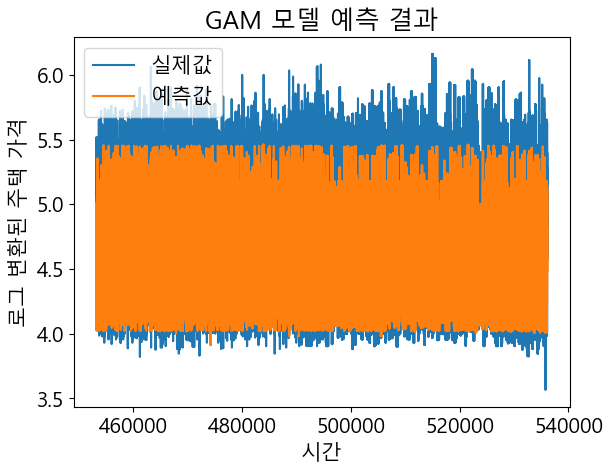

In [ ]:
# 예측 결과 시각화
plt.plot(y_test.index, y_test_scaled, label='실제값')
plt.plot(y_test.index, test_predictions, label='예측값')
plt.xlabel('시간')
plt.ylabel('로그 변환된 주택 가격')
plt.title('GAM 모델 예측 결과')
plt.legend()
plt.show()